In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
Duration_Weight = {
    'Eat':6,
    'Sleep': 10,
    'Medicine': 1
}
Start_Weight = {
    'Medicine': 60,
    'Eat':10,
    'Sleep': 15
}

activities = {
        'Eat':['Eat','Eat_Breakfast','Eat_Dinner','Eat_Lunch'], 
        'Sleep':['Sleep'],
        'Medicine':['Morning_Meds', 'Evening_Meds']
}

In [7]:
def to_duration(s, f):
    s = to_hrs(s)
    f = to_hrs(f)
    m = (f-s)*60
    m = float('%.2f'%m)
    return m

def to_hrs(ts):
    h, m, s = map(int,ts.split(':'))
    hrs = h + m/60
    hrs = float('%.2f'%hrs)
    return hrs
    

    

In [26]:
def tmf(x,a,b,c,d):
    c1 = (x-a)/(b-a)
    c2 = (d-x)/(d-c)
    y = max(min(c1, c2, 1), 0)
    return y
    
def tmf_abnormal_left(x, a, b):
    if x < a:
        return 1
    elif x >= a and x <= b:
        return (b-x)/(b-a)
    elif x > b:
        return 0
    
def tmf_abnormal_right(x, c, d):
    if x < c:
        return 0
    elif x >= c and x <= d:
        return (c-x)/(c-d)
    elif x > d:
        return 1
    
percentage_factor = 0.3
def plot_fuzzy(sd, b,c, title):
    
    diff = c-b
    a = b - (diff*percentage_factor)
    d = c + (diff*percentage_factor)
    
    X = np.arange(a-diff, d+ diff, 0.01)
    normal = [tmf(x,a,b,c,d) for x in X]
    ab_left = [tmf_abnormal_left(x, a, b) for x in X]
    ab_right = [tmf_abnormal_right(x, c, d) for x in X]
    
    plt.figure()
    plt.plot(X, normal)
    plt.plot(X, ab_left)
    plt.plot(X, ab_right)
    plt.title(title)
    plt.ylim([0,1.1])
    
def get_abcd(b, c):
    diff = c - b
    a = b - (diff * percentage_factor)
    d = c + (diff * percentage_factor)
    return (a,b,c,d)

In [9]:
normal_path = r'D:\Daily Life Anomaly Detection\CASAS_DATA\HH111\Activities\Clusters\Normal.csv'
normal_df = pd.read_csv(normal_path)

In [10]:
read_path = r'D:\Daily Life Anomaly Detection\CASAS_DATA\HH120\processed_data\Day1.csv'
day_df = pd.read_csv(read_path)

med_df = day_df.loc[day_df['Activity'].isin(activities['Medicine'])]
eat_df = day_df.loc[day_df['Activity'].isin(activities['Eat'])]
sleep_df = day_df.loc[day_df['Activity'].isin(activities['Sleep'])]

In [18]:
normal_df


,Activity,Label,Start,Duration,min_start,max_start,min_dur,max_dur
0,Eat,Eat1,18.42,11.18,15.62,22.23,6.0,16.2
1,Eat,Eat2,7.51,13.33,5.98,8.83,6.0,19.8
2,Eat,Eat3,17.90,1.35,16.42,18.68,0.0,3.6
3,Eat,Eat4,12.18,9.92,11.37,13.67,2.4,15.0
4,Sleep,Sleep1,0.29,387.41,0.00,1.12,262.2,450.0
5,Sleep,Sleep2,23.09,43.74,21.73,23.98,0.0,125.4
6,Medicine,Medicine1,7.23,2.00,5.85,9.58,2.0,2.0
7,Medicine,Medicine2,22.43,2.00,21.05,23.95,2.0,2.0


In [12]:
sleep_df

,Date,Start,Finish,Location,Activity
0,2012-01-28,00:04:14,07:15:57,Bedroom,Sleep
35,2012-01-28,21:03:14,23:55:37,Bedroom,Sleep


In [39]:
act = normal_df[normal_df['Activity'] == 'Sleep']
actEat = normal_df[normal_df['Activity'] == 'Eat']

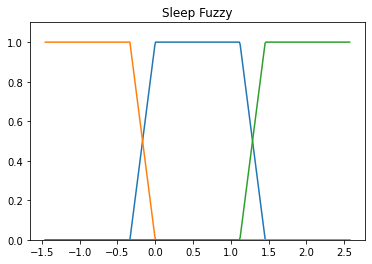

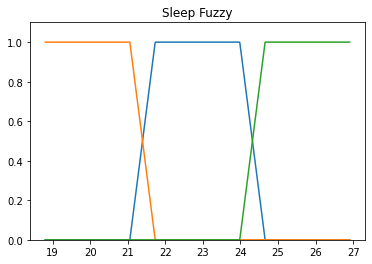

In [44]:
for i in range(len(act)):
    row = act.iloc[i]
    plot_fuzzy(row['Label'], row['min_start'], row['max_start'], 'Sleep Fuzzy')

In [38]:
for i in range(len(sleep_df)):
    row = sleep_df.iloc[i]
    st = to_hrs(row['Start'])
    
    print('Sleep', i+1)
    for j in range(len(act)):
        clus = act.iloc[j]
        
        minst = clus['min_start']
        maxst = clus['max_start']
        #print(st)
        a,b,c,d = get_abcd(minst, maxst)
        
        n = tmf(st, a,b,c,d)
        al = tmf_abnormal_left(st, a, b)
        ar = tmf_abnormal_right(st, c, d)
        print('CLuster:', j+1) 
        score = {
            'Normal': n,
            'Abnormal Left': al,
            'Abnormal right': ar
            
        }
        print(score)
    print()

Sleep 1
CLuster: 1
{'Normal': 1, 'Abnormal Left': 0, 'Abnormal right': 0}
CLuster: 2
{'Normal': 0, 'Abnormal Left': 1, 'Abnormal right': 0}

Sleep 2
CLuster: 1
{'Normal': 0, 'Abnormal Left': 0, 'Abnormal right': 1}
CLuster: 2
{'Normal': 0, 'Abnormal Left': 1, 'Abnormal right': 0}



In [43]:
for i in range(len(eat_df)):
    row = eat_df.iloc[i]
    st = to_hrs(row['Start'])
    
    print('Eat', i+1)
    for j in range(len(actEat)):
        clus = actEat.iloc[j]
        
        minst = clus['min_start']
        maxst = clus['max_start']
        #print(st)
        a,b,c,d = get_abcd(minst, maxst)
        
        n = tmf(st, a,b,c,d)
        al = tmf_abnormal_left(st, a, b)
        ar = tmf_abnormal_right(st, c, d)
        print('CLuster:', j+1) 
        score = {
            'Normal': n,
            'Abnormal Left': al,
            'Abnormal right': ar
            
        }
        print(score)
    print()

Eat 1
CLuster: 1
{'Normal': 0.9899142713061021, 'Abnormal Left': 0.010085728693897917, 'Abnormal right': 0}
CLuster: 2
{'Normal': 0, 'Abnormal Left': 0, 'Abnormal right': 1}
CLuster: 3
{'Normal': 0, 'Abnormal Left': 1, 'Abnormal right': 0}
CLuster: 4
{'Normal': 0, 'Abnormal Left': 0, 'Abnormal right': 1}

